In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

✍ Теперь, когда мы познакомились с информацией в таблице, настало время самого сложного этапа — предобработки данных.

Как вы могли уже заметить, наши данные очень «сырые»: признаки представлены в неудобном для анализа и очистки формате.

Например, столбец «Пол/возраст» содержит информацию и о поле, и о возрасте, и о дате рождения. Желаемая заработная плата представлена в виде текста с указанием валюты, в которой она исчисляется, и так далее…

Всё это не позволяет нам визуально оценить зависимости в данных: построить гистограмму распределения зарплаты и возраста, столбчатую диаграмму зарплаты по уровню образования и многое другое. Более того, мы не можем в таком виде заполнить пропущенные значения числовыми константами или найти выбросы. Иными словами, нам необходимо преобразовать данные, что позволит грамотно работать с ними.

⚡ Важно! Старайтесь выполнять обработку с помощью функций-преобразований (lambda-функций), которые принимают аргументом элемент столбца и возвращают его преобразованную версию. Данные функции применяйте к признакам с помощью метода apply().

In [34]:
hh_data.copy()
education = hh_data['Образование и ВУЗ'].str.split().str[0:2]
print(hh_data['Образование и ВУЗ'].unique())

['Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота, Калининград судоводительский, Организация и безопасность движения'
 'Высшее образование 1981  Военно-космическая академия им. А.Ф. Можайского, Санкт-Петербург АСУ, АСУ'
 'Среднее специальное образование 2002 Профессиональный лицей 39 г. Твери Экономический, Банковское дело'
 ...
 'Высшее образование (Бакалавр) 2016  Воронежский государственный университет, Воронеж Факультет журналистики , Реклама и связи с общественностью, Связи с общественностью 2012 Воронежский государственный технический университет, Воронеж Естественно-технический колледж , Вычислительные машины, комплексы, системы и сети, Специалист, Техник'
 'Высшее образование 2000  Южно-Уральский государственный университет (Национальный исследовательский университет), Челябинск Приборостроительный факультет, ЭВМ 1993 Челябинский государственный университет, Челябинск Математический факультет, Математик'
 'Высшее образование 1997

# Задание 3.1

Сколько соискателей имеет средний уровень образования (школьное образование)?

In [35]:
def get_education(text):
    education = ' '.join(text.split(' ')[:2])
    if 'Неоконченное высшее' in education:
        return 'неоконченное высшее'
    elif 'Высшее' in education:
        return 'высшее'
    elif 'Среднее специальное' in education:
        return 'среднее специальное'
    elif 'Среднее образование' in education:
        return 'среднее'
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)
print(hh_data['Образование'].value_counts())

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64


# Задание 3.2

Теперь нас интересует столбец «Пол, возраст». Его текущий формат: <Пол , возраст, дата рождения>. Например:

Мужчина , 39 лет , родился 27 ноября 1979
Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец..

Создайте два новых признака «Пол» и «Возраст». При этом важно учесть:

Признак пола должен иметь два уникальных строковых значения: М — мужчина, Ж — женщина.
Признак возраста должен быть представлен целыми числами.
Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Пол, возраст» из таблицы.

Обратите внимание на структуру текста в столбце, а точнее на то, как разделены параметры пола, возраста и даты рождения между собой — символом ' , '.

Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.


Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.

In [36]:
def get_gender(arg):
    gender = arg.split(',')[0].strip()
    if 'Мужчина' in gender:
        return 'М'
    else:
        return 'Ж'
    

hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_gender)



Пол
М    36211
Ж     8533
Name: count, dtype: int64

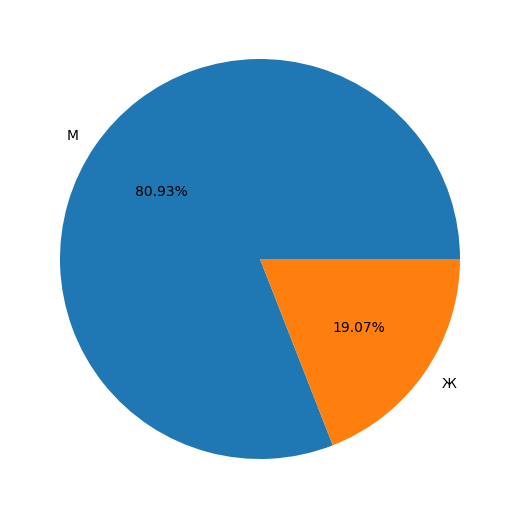

In [37]:
gender_comb = hh_data['Пол'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gender_comb,
    labels=gender_comb.index,
    autopct='%.2f%%',
);
display(gender_comb)

Чему равен средний возраст соискателей? Ответ округлите до десятых.

In [38]:
def get_age(arg):
    text = arg.split(',')[1].strip()
    age = text.split(' ')[0].strip()
    return int(age)

hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
display(hh_data['Возраст'].mean())

np.float64(32.19674146254246)

In [39]:
hh_data =  hh_data.drop('Пол, возраст', axis = 1)

# Задание 3.3

Следующим этапом преобразуем признак «Опыт работы». Его текущий формат: <Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовём «Опыт работы (месяц)».

Для начала обсудим условия решения задачи:

Во-первых, в данном признаке есть пропуски. Условимся, что, если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN).
Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значение Не указано. Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях).

В-четвёртых, у нас есть проблема: опыт работы может быть представлен только в годах или только в месяцах. Например, можно встретить следующие варианты:

Опыт работы 3 года 2 месяца
Опыт работы 4 года
Опыт работы 11 месяцев
Учитывайте эту особенность в вашем коде.

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.

Выполните преобразование и удалите столбец «Опыт работы» из таблицы.

Чему равен медианный опыт работы (в месяцах) в нашей таблице?

In [75]:
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return np.nan
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)
display(hh_data['Опыт работы (месяц)'].median())

np.float64(100.0)

In [76]:
hh_data =  hh_data.drop('Опыт работы', axis = 1)

# Задание 3.4

Хорошо идём! :) Следующий на очереди — признак «Город, переезд, командировки». Информация в нём представлена в следующем виде: <Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>.

В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

Москва , не готов к переезду , готов к командировкам
Москва , м. Беломорская , не готов к переезду, не готов к командировкам
Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам
Создадим отдельные признаки «Город», «Готовность к переезду», «Готовность к командировкам». При этом важно учесть:

⛏ Признак «Город» может содержать только четыре категории: «Москва», «Санкт-Петербург» и «город-миллионник» (их список ниже), остальные обозначьте как «другие».

Список городов-миллионников

million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]

Информация о метро, рядом с которым проживает соискатель, нас не интересует.

⛏ Признак «Готовность к переезду» должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке «Город, переезд, командировки». Например:

… , готов к переезду , …
… , не готова к переезду , …
… , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
… , хочу переехать (США) , …
Нас интересует только сам факт возможности/желания переезда.

⛏ Признак «Готовность к командировкам» должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке «Город, переезд, командировки». Например:

… , готов к командировкам , …
… , готова к редким командировкам , …
… , не готов к командировкам , …
Нас интересует только сам факт готовности к командировке.

Ещё один важный момент: при выгрузке данных у некоторых соискателей «потерялась» информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.

Выполните преобразования и удалите столбец «Город, переезд, командировки» из таблицы.

Обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учтите это, если будете использовать порядок слов в своей программе.

Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.

In [85]:
def get_city(arg):
    city = arg.split(' ')[0]
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    if city == 'Москва':
        return city
    elif city == 'Санкт-Петербург':
        return city
    elif city in million_cities:
        return 'город-миллионник'  
    else:
        return 'другие'  
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
display(hh_data['Город'])

0                  другие
1                  другие
2                  другие
3                  другие
4                  Москва
               ...       
44739              другие
44740              другие
44741    город-миллионник
44742              другие
44743              Москва
Name: Город, Length: 44744, dtype: object

Город
Москва              16621
другие              16452
город-миллионник     6734
Санкт-Петербург      4937
Name: count, dtype: int64

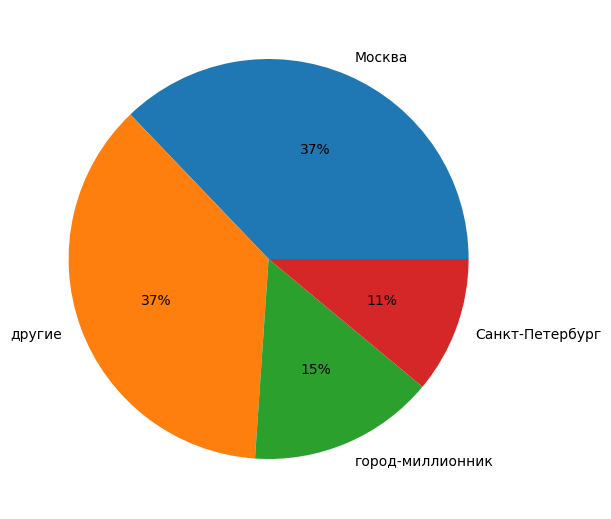

In [86]:
city_piter = hh_data['Город'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    city_piter,
    labels=city_piter.index,
    autopct='%.0f%%',
);
display(city_piter)

Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

In [124]:
def get_moving(arg):
    moving = arg.split(',')
    if 'м.' in moving[1]:
        if 'не' in moving[2]:
            return False
        else:
            return True
    else:
        if 'не' in moving[1]:
            return False
        else:
            return True        
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_moving)
display(hh_data['Готовность к переезду'])

0        False
1        False
2        False
3        False
4        False
         ...  
44739     True
44740     True
44741     True
44742    False
44743    False
Name: Готовность к переезду, Length: 44744, dtype: bool

In [125]:
def get_trip(arg):
    trip = arg.split(',')
    if 'м.' in trip[1]:
        if 'не' in trip[3]:
            return False
        else:
            return True
    else:
        if 'не' in trip[2]:
            return False
        else:
            return True     
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_trip)
display(hh_data['Готовность к командировкам'])

0        False
1         True
2        False
3         True
4         True
         ...  
44739     True
44740     True
44741     True
44742    False
44743    False
Name: Готовность к командировкам, Length: 44744, dtype: bool

In [127]:
print(round(hh_data[hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']].shape[0] / hh_data.shape[0] *100))

32


In [128]:
hh_data =  hh_data.drop('Город, переезд, командировки', axis = 1)

# Задание 3.5

Рассмотрим поближе признаки «Занятость» и «График».

Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтёрство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удалённая работа, вахтовый метод).

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:

полная занятость, частичная занятость;
частичная занятость, проектная работа, волонтёрство;
полный день, удалённая работа;
вахтовый метод, гибкий график, удалённая работа, полная занятость.
Такой вариант признаков имеет множество различных комбинаций, а значит, множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-«мигалки» для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе — False.

Такой метод преобразования категориальных признаков называется One Hot Encoding, его схема представлена на рисунке ниже:

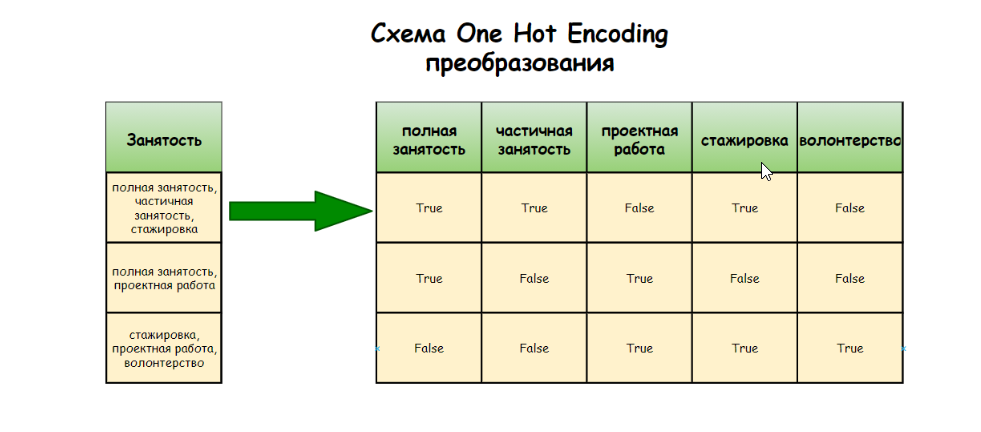

Выполните данное преобразование для признаков «Занятость» и «График», ответьте на контрольные вопросы, после чего удалите их из таблицы.


In [135]:
display(hh_data['Занятость'])

0        частичная занятость, проектная работа, полная ...
1        частичная занятость, проектная работа, полная ...
2                                         полная занятость
3        частичная занятость, проектная работа, полная ...
4                                         полная занятость
                               ...                        
44739                                     полная занятость
44740    проектная работа, частичная занятость, полная ...
44741                                     полная занятость
44742                частичная занятость, полная занятость
44743                                     полная занятость
Name: Занятость, Length: 44744, dtype: object

In [136]:
display(hh_data['График'])

0        гибкий график, полный день, сменный график, ва...
1        гибкий график, полный день, сменный график, уд...
2                                              полный день
3                          гибкий график, удаленная работа
4                                              полный день
                               ...                        
44739                        полный день, удаленная работа
44740    удаленная работа, гибкий график, полный день, ...
44741                        полный день, удаленная работа
44742                                     удаленная работа
44743                                          полный день
Name: График, Length: 44744, dtype: object